In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt
from sklearn import metrics
import seaborn as sns

In [2]:
nba = pd.read_csv("final_table.csv", index_col=0)
nba.fillna(0, inplace=True)
nba.sample(10)

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk
148,Joe Ingles,UTA,SF,11954546.0,16908.83,32.0,12.6,707.0,72.0,2137.0,373.0,65.0,11.0
384,Darius Bazley,OKC,PF,2284800.0,6680.70,19.0,9.6,342.0,61.0,1130.0,41.0,23.0,41.0
492,Malcolm Miller,TOR,SF,1588231.0,45378.03,26.0,6.7,35.0,28.0,162.0,11.0,5.0,2.0
21,Kevin Love,CLE,PF,28900000.0,29280.65,31.0,17.9,987.0,56.0,1780.0,178.0,33.0,19.0
13,Kawhi Leonard,LAC,SF,32742000.0,21219.70,28.0,26.9,1543.0,57.0,1848.0,280.0,103.0,33.0
14,Gordon Hayward,BOS,SF,32700690.0,35974.36,29.0,18.1,909.0,52.0,1740.0,212.0,38.0,22.0
462,Cheick Diallo,PHO,C,1678854.0,7666.00,23.0,16.5,219.0,47.0,479.0,22.0,11.0,12.0
458,Jonah Bolden,PHO,PF,1698450.0,283075.00,24.0,4.9,6.0,3.0,33.0,0.0,2.0,2.0
429,Keldon Johnson,SAS,SF,1950600.0,12666.23,20.0,19.1,154.0,17.0,301.0,15.0,14.0,2.0
316,Justin Jackson,DAL,PF,3280920.0,9113.67,24.0,9.5,360.0,65.0,1045.0,52.0,15.0,10.0


In [3]:
games= nba[nba['pts']<=100.0]
# pts= nba[nba['pts']==0.0]
# mp=nba[nba['mp']==0.0]
# pts.shape
games

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk
637,Paul Watson,TOR,SF,50752.0,1637.16,25.0,-7.1,31.0,8.0,70.0,5.0,3.0,1.0
603,Cameron Payne,PHO,PG,196288.0,2256.18,25.0,15.7,87.0,8.0,183.0,24.0,8.0,2.0
614,Johnathan Williams,WAS,C,106181.0,2359.58,24.0,14.0,45.0,15.0,180.0,8.0,1.0,8.0
604,Mychal Mulder,GSW,SG,187782.0,2438.73,25.0,7.8,77.0,7.0,204.0,8.0,2.0,1.0
620,Donta Hall,BRK,PF,101504.0,3075.88,22.0,17.2,33.0,5.0,85.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Sir'Dominic Pointer,0,0,50752.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,Isaiah Taylor,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
641,Tyler Lydon,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
642,Hollis Thompson,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(nba[nba['yr2019_20']==33005556.0])


        Player   tm pos   yr2019_20  avg_cost_per_pt   Age   PER     pts  \
9  Paul George  LAC  SF  33005556.0         31951.17  29.0  21.1  1033.0   

      g      mp    ast   stl   blk  
9  48.0  1419.0  185.0  68.0  20.0  


In [5]:
nba.shape
nba['yr2019_20'].astype(float)
nba.dtypes

Player              object
tm                  object
pos                 object
yr2019_20          float64
avg_cost_per_pt    float64
Age                float64
PER                float64
pts                float64
g                  float64
mp                 float64
ast                float64
stl                float64
blk                float64
dtype: object

In [6]:
index_names = nba[ nba['pts'] <= 100.0 ].index
#index_names = nba[ nba['g'] == 0.0 ].index
  
# drop these row indexes 
# from dataFrame 
nba.drop(index_names, inplace = True) 
nba

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk
612,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0
587,Ky Bowman,GSW,PG,350189.0,1045.34,22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0
545,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0
606,PJ Dozier,DEN,PG,183115.0,1089.97,23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0
530,Devonte' Graham,CHO,PG,1416852.0,1237.43,24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Gorgui Dieng,MEM,C,16229213.0,131944.82,30.0,17.8,123.0,17.0,318.0,15.0,14.0,17.0
95,Brandon Knight,DET,PG,15643750.0,150420.67,28.0,5.4,104.0,9.0,221.0,38.0,5.0,1.0
34,Otto Porter,CHI,SF,27250576.0,163177.10,26.0,15.8,167.0,14.0,331.0,25.0,15.0,6.0
40,Andre Drummond,CLE,C,27093019.0,193521.56,26.0,22.1,140.0,8.0,225.0,14.0,12.0,11.0


In [7]:
print(nba[nba['g']==0.0])
nba.describe

Empty DataFrame
Columns: [Player, tm, pos, yr2019_20, avg_cost_per_pt, Age, PER, pts, g, mp, ast, stl, blk]
Index: []


<bound method NDFrame.describe of               Player   tm pos   yr2019_20  avg_cost_per_pt   Age   PER  \
612    Luguentz Dort  OKC  SG    155647.0           637.90  20.0   7.6   
587        Ky Bowman  GSW  PG    350189.0          1045.34  22.0   9.1   
545    Eric Paschall  GSW  PF    898310.0          1073.25  23.0  14.5   
606        PJ Dozier  DEN  PG    183115.0          1089.97  23.0  11.6   
530  Devonte' Graham  CHO  PG   1416852.0          1237.43  24.0  15.8   
..               ...  ...  ..         ...              ...   ...   ...   
90      Gorgui Dieng  MEM   C  16229213.0        131944.82  30.0  17.8   
95    Brandon Knight  DET  PG  15643750.0        150420.67  28.0   5.4   
34       Otto Porter  CHI  SF  27250576.0        163177.10  26.0  15.8   
40    Andre Drummond  CLE   C  27093019.0        193521.56  26.0  22.1   
0      Stephen Curry  GSW  PG  40231758.0        386843.83  31.0  21.7   

        pts     g      mp    ast   stl   blk  
612   244.0  36.0   820.0   27

In [8]:
# Assign the data to X and y
X = nba[["Age","g","pts","mp","stl","ast", "blk", "PER"]]#.values.reshape(-1, 1)
y = nba["yr2019_20"].values.reshape(-1, 1)
print(X.shape, y.shape)

(345, 8) (345, 1)


In [9]:
y.shape
# print(X[X['pts']==0])

(345, 1)

In [10]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [11]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5021265639853851
Testing Score: 0.6161809525343431


In [13]:
coeff_df =pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coeff_df

##This means that for a unit increase in "pts", there is a increase of $8498.86 in salary

,Coefficient
Age,773192.666659
g,-270565.877556
pts,7497.366474
mp,3664.366533
stl,12863.844901
ast,4794.657171
blk,35942.382065
PER,324052.144201


In [14]:
y_pred = model.predict(X_test)
# salary_pred= "${:.2f}".format(salary_pred)
#print(y_pred)
pred_df = pd.DataFrame(y_pred, columns=['Predicted_Salary'])
#pred_df=pred_df.style.format("${:,.2f}")
pred_df

,Predicted_Salary
0,1.101880e+07
1,1.261203e+07
2,-1.319153e+05
3,1.733115e+06
4,7.949297e+06
...,...
82,2.130264e+06
83,3.070547e+07
84,4.114304e+06
85,2.239685e+06


In [15]:
predictions = model.predict(X)
print(f"True output: {y[5]}")
print(f"Predicted output: {predictions[5]}")
print(f"Prediction Error: {predictions[5]-y[5]}")

True output: [842327.]
Predicted output: [9814988.16152269]
Prediction Error: [8972661.16152269]


In [16]:
x_min = X.min()
x_max = X.max()

In [17]:
y_min_actual = y.min()
y_max_actual = y.max()

In [18]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 155647.0
Calculated Min Value: Age     338.256686
g       164.096346
pts    1370.778698
mp     1831.059594
stl     139.216298
ast     201.416419
blk     101.896225
PER     147.924315
dtype: float64
Actual Max Value: 40231758.0
Calculated Max Value: Age      636.817267
g       1022.458019
pts    29149.352825
mp     31898.598182
stl     1656.899255
ast     8610.872805
blk     2540.140976
PER      498.732998
dtype: float64


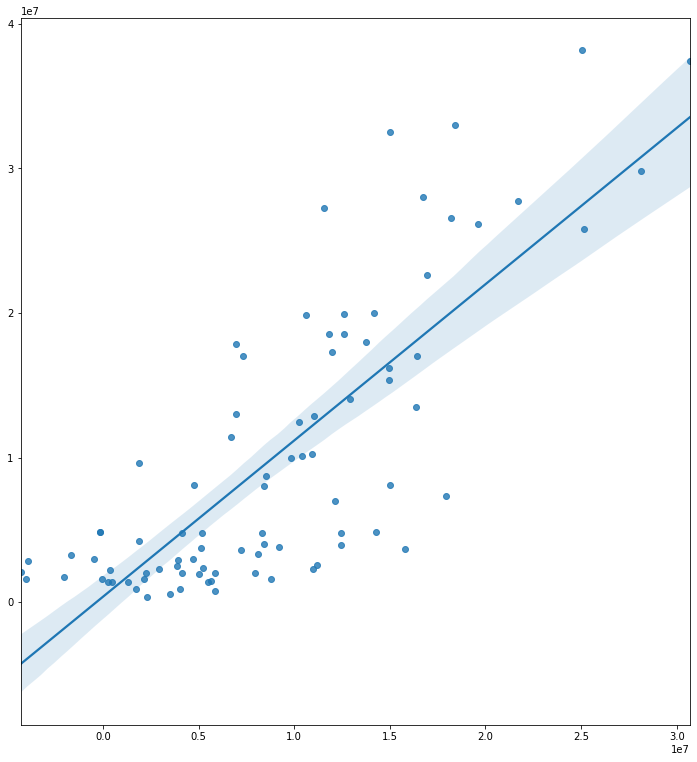

In [19]:
plt.figure(figsize = (12,13))
sns.regplot(x=y_pred, y=y_test);

In [20]:
salary_pred = pd.DataFrame({"Actual Salary": y_test[0], "Predicted": y_pred[0]})
#salary_pred=salary_pred.style.format("${:,.2f}")
salary_pred

,Actual Salary,Predicted
0,12900000.0,1.101880e+07


In [21]:
y_test=(y_test)
y_test = pd.DataFrame(y_test, columns=['actual_salary'])
#y_test=y_test.style.format("${:,.2f}")
y_test

,actual_salary
0,12900000.0
1,19894737.0
2,4862040.0
3,898310.0
4,2028594.0
...,...
82,1618520.0
83,37436858.0
84,4767000.0
85,1995120.0


In [22]:
comparisons = pd.concat([y_test, pred_df], axis=1, sort=False)
#comparisons=comparisons.style.format("${:,.2f}")
# comparison = comparisons.sample(10)
#comparison=comparison.style.format("${:,.2f}")
#print(comparisons)
#print(comparisons.sample(10))

In [23]:
comparisons.style.format("${:,.2f}")

,actual_salary,Predicted_Salary
0,"$12,900,000.00","$11,018,802.92"
1,"$19,894,737.00","$12,612,033.27"
2,"$4,862,040.00","$-131,915.31"
3,"$898,310.00","$1,733,114.83"
4,"$2,028,594.00","$7,949,297.42"
5,"$7,317,073.00","$17,916,545.30"
6,"$2,193,480.00","$375,359.57"
7,"$13,000,000.00","$6,976,161.94"
8,"$2,905,800.00","$3,903,358.82"
9,"$1,618,520.00","$-4,028,461.52"


In [24]:
# comparisons = pd.DataFrame({"Actual Salary": y_test,
#                            "Predicted Salary": pred_df})
# comparisons

In [25]:
# root mean Sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
print ('on average my model errs by', rmse)

on average my model errs by 6070079.8648304595


In [26]:
r2=metrics.r2_score(y_test, y_pred)
r2

0.6161809525343431

In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4718165.659273267
Mean Squared Error: 36845869565420.164
Root Mean Squared Error: 6070079.8648304595


In [28]:
predicted_salary = model.predict(X)

nba['predicted_salary'] = predicted_salary
nba

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk,predicted_salary
612,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0,4.066783e+05
587,Ky Bowman,GSW,PG,350189.0,1045.34,22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0,2.282389e+06
545,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0,6.786466e+06
606,PJ Dozier,DEN,PG,183115.0,1089.97,23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0,3.877372e+06
530,Devonte' Graham,CHO,PG,1416852.0,1237.43,24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0,1.362663e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Gorgui Dieng,MEM,C,16229213.0,131944.82,30.0,17.8,123.0,17.0,318.0,15.0,14.0,17.0,1.402902e+07
95,Brandon Knight,DET,PG,15643750.0,150420.67,28.0,5.4,104.0,9.0,221.0,38.0,5.0,1.0,9.550451e+06
34,Otto Porter,CHI,SF,27250576.0,163177.10,26.0,15.8,167.0,14.0,331.0,25.0,15.0,6.0,1.114281e+07
40,Andre Drummond,CLE,C,27093019.0,193521.56,26.0,22.1,140.0,8.0,225.0,14.0,12.0,11.0,1.430526e+07


In [29]:
nba['predicted_salary']=nba['predicted_salary'].map("${:,.2f}".format)

nba.sample(10)

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk,predicted_salary
2,Russell Westbrook,HOU,PG,38178000.0,24583.39,31.0,21.0,1553.0,57.0,2049.0,401.0,93.0,20.0,"$25,055,610.41"
187,E'Twaun Moore,NOP,SG,8664928.0,18594.27,30.0,11.3,466.0,56.0,1020.0,78.0,32.0,11.0,"$6,832,557.06"
411,Kyle O'Quinn,PHI,C,2028594.0,19888.18,29.0,18.6,102.0,29.0,313.0,51.0,7.0,24.0,"$10,426,674.30"
545,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0,"$6,786,466.05"
23,Al Horford,PHI,C,28000000.0,35087.72,33.0,15.7,798.0,67.0,2025.0,270.0,52.0,61.0,"$16,748,524.05"
178,Delon Wright,DAL,SG,9473684.0,18796.99,27.0,15.4,504.0,73.0,1570.0,244.0,85.0,22.0,"$5,415,337.52"
280,Dorian Finney-Smith,DAL,PF,4000000.0,5899.71,26.0,12.3,678.0,71.0,2120.0,114.0,45.0,39.0,"$6,971,819.59"
17,Tobias Harris,PHI,PF,31034483.0,21994.67,27.0,17.2,1411.0,72.0,2469.0,227.0,53.0,40.0,"$16,517,384.83"
217,Ersan İlyasova,MIL,PF,7000000.0,16908.21,32.0,14.9,414.0,63.0,986.0,49.0,24.0,17.0,"$7,110,815.92"
303,T.J. McConnell,IND,PG,3500000.0,7543.10,27.0,16.5,464.0,71.0,1326.0,355.0,56.0,11.0,"$4,882,715.78"


In [30]:
nba= nba[["Player", "tm", "pos", "yr2019_20","predicted_salary", "Age","PER", "pts", "g", "mp", "ast", "stl", "blk"]]
nba['yr2019_20']=nba['yr2019_20'].map("${:,.2f}".format)
nba

<ipython-input-30-662dffd38f06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['yr2019_20']=nba['yr2019_20'].map("${:,.2f}".format)


,Player,tm,pos,yr2019_20,predicted_salary,Age,PER,pts,g,mp,ast,stl,blk
612,Luguentz Dort,OKC,SG,"$155,647.00","$406,678.31",20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0
587,Ky Bowman,GSW,PG,"$350,189.00","$2,282,389.41",22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0
545,Eric Paschall,GSW,PF,"$898,310.00","$6,786,466.05",23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0
606,PJ Dozier,DEN,PG,"$183,115.00","$3,877,371.69",23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0
530,Devonte' Graham,CHO,PG,"$1,416,852.00","$13,626,632.08",24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Gorgui Dieng,MEM,C,"$16,229,213.00","$14,029,024.90",30.0,17.8,123.0,17.0,318.0,15.0,14.0,17.0
95,Brandon Knight,DET,PG,"$15,643,750.00","$9,550,450.88",28.0,5.4,104.0,9.0,221.0,38.0,5.0,1.0
34,Otto Porter,CHI,SF,"$27,250,576.00","$11,142,812.68",26.0,15.8,167.0,14.0,331.0,25.0,15.0,6.0
40,Andre Drummond,CLE,C,"$27,093,019.00","$14,305,263.85",26.0,22.1,140.0,8.0,225.0,14.0,12.0,11.0


In [31]:
nba.to_csv("csv_files/nba_stuff.csv")